# NeuroSensum Task 

What I need to do:

1. Focus on Apple Iphone 4,5,6 and 7 and Samsung Galaxy S4,5,6,7

2. Find Top Topics people are talking about

3. The frequency of Each Topic

4. Sentiment associated with each topic

As the dataset is unlabeled and the problem is unsupervised. I'm dividing the the main probelm into sub-problem and build some intution around the dataset. 

I'm divinging given dataset into two sub dataset(apple and samsung) and further into subsets of subdataset (iPhone 4,5,6 and 7 and Samsung Galaxy S4,5,6,7)
   
There are two main things to do 
    
###### Finding Topics. 
    
    At first I applied LDA on this dataset, but as we can have short sentences, there is no advantage of using 
    complex algorithm for finding the topics.I'll be using frequency of words and conclude results. 
    If you want to use complex algoritm on this dataset I can do that too.    
    
###### Sentiment Analysis.
     
    I'm going to use VADER to handle sentiment analysis just for the sake of having good result, I also use this
    library for my Open Source Project.
    
    
# Ipython Notebooks Workflow    
---------------------------------------

    i. I divided my explanantion into 3 notebooks, this notebook is for finding Sentiment asssociated with each
    review.

    ii. Next two notebooks are focused on the products and company-wise analysis
---------------------------------------

In [67]:
# LOADING GENSIM AND NLTK 
import gensim
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
import numpy as np
np.random.seed(2018)
import nltk
import pandas as pd
from multiprocessing import Pool
from nltk import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

### Using helper function for text cleaning

In [48]:
# USED HELPER FUNCTIONS FOR PREPROCESSING, you can find the whole project on below link.

# https://github.com/arxiv-sanityOverload/Recsys/blob/master/Jupyter%20Notebooks/LDA/Title%20and%20Abstract.ipynb

# for dataframe partition 
num_partitions = 1000 #number of partitions to split dataframe

def parallelize_dataframe(df, func):
    df_split = np.array_split(df, num_partitions)
    pool = Pool()
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

def clean_df(df):
#     start = time.time()
#     print('Process working on: ',os.getpid())
    df['tokenized'] = df['Reviews'].apply(lambda x: apply_all(x))
#     print('Process done:',os.getpid())
#     print()
#     end = time.time()
#     print("time to complete :", end-start)
    return df

# For data cleaning 

'''
Change the cleaning process for text , remove weblinks, numbers, apply stemming and group words. 

'''
def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = text.lower() # lower case the text
    text = re.sub("[^a-zA-Z ]", " ", text)
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('english')

def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return remove_stop_words(initial_clean(text))

def word_frequency(df):
    # first get a list of all words
    all_words = [word for item in list(df['tokenized']) for word in item]
    # use nltk fdist to get a frequency distribution of all words
    fdist = FreqDist(all_words)
    len(fdist) # number of unique words
    return(fdist)

def top_k_words(fdist, k, top):
    top_k_words = fdist.most_common(k)
    data = pd.DataFrame(top_k_words, columns=['key','value'])
    return data

def sentiment(dataframe):
    l = []
    a = dataframe["Reviews"].apply(lambda x: analyser.polarity_scores(x)) 
    for i in a:
        l.append(i)
    df = pd.DataFrame(l)
    return df

In [4]:
#READING DATA
data = pd.read_csv("./Amazon_Unlocked_Mobile.csv")

In [5]:
data_samsung = data[data["Brand Name"] == 'Samsung']
data_apple = data[data["Brand Name"] == 'Apple']

In [6]:
data_samsung.to_csv('data_samsung.csv', index=False)
data_apple.to_csv('data_apple', index=False)

# Samsung Sentiment Analysis

In [84]:
#SAMSUNG
samsung_S6_7 = data_samsung[data_samsung['Product Name'].str.contains("Samsung Galaxy S6|Samsung Galaxy S7, 32GB")]
samsung_S4_5 = data_samsung[data_samsung['Product Name'].str.contains("Samsung Galaxy S5|Samsung Galaxy S4")]
samsung = pd.concat([samsung_S4_5, samsung_S6_7], axis=0)
samsung = samsung.reset_index(drop=True)
samsung["Reviews"] = samsung["Reviews"].dropna()
samsung["Reviews"] =samsung.Reviews.astype('str')
samsung = parallelize_dataframe(samsung, clean_df)
#SAMSUNG SENTIMENT ANALYSIS 
sentiment_analysis_samsung = sentiment(samsung)
result = pd.concat([sentiment_analysis_samsung, samsung], axis=1, sort=False)

In [85]:
result.head(10)

,compound,neg,neu,pos,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,tokenized
0,-0.2960,1.000,0.000,0.000,Samsung Galaxy S4 - Unlocked (Black),Samsung,2000.00,3,No,0.0,[]
1,0.2960,0.000,0.476,0.524,Samsung Galaxy S4 - Unlocked (Black),Samsung,2000.00,5,Its all ok,0.0,[ok]
2,0.0000,0.000,1.000,0.000,Samsung Galaxy S4 - Unlocked (Black),Samsung,2000.00,5,excelent,0.0,[excelent]
3,0.3561,0.148,0.605,0.247,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,Samsung,99.99,4,Nice phone!!! Only thing it that the usb cap w...,0.0,"[nice, phone, thing, usb, cap, missing]"
4,0.5719,0.000,0.213,0.787,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,Samsung,99.99,5,Excellent Phone,0.0,"[excellent, phone]"
5,0.7893,0.000,0.632,0.368,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,Samsung,99.99,5,Hella of a good phone and the screen is amazin...,0.0,"[hella, good, phone, screen, amazing, best, ph..."
6,0.0000,0.000,1.000,0.000,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,Samsung,99.99,1,This phone was NOT new and has not worked as a...,1.0,"[phone, new, worked, advertised]"
7,0.0000,0.000,1.000,0.000,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,Samsung,99.99,3,Phone after a couple months got very slow and ...,1.0,"[phone, couple, months, got, slow, speaker, st..."
8,0.8978,0.000,0.729,0.271,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,Samsung,99.99,5,I absolutely love the S4 Active. I'm on my thi...,0.0,"[absolutely, love, active, third, one, limits,..."
9,-0.8459,0.142,0.760,0.098,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,Samsung,99.99,4,Overall I'm really happy. I brought this unloc...,1.0,"[overall, really, happy, brought, unlocked, ph..."


In [88]:
result.to_csv("sentiments_samsung.csv", index=False)

In [91]:
# import matplotlib.pyplot as plt
# result.plot(y=["neg", "pos", "compound", "neu"], kind="bar", figsize=(20,20))

# Apple Sentiment Analysis and plot

In [81]:
#APPLE
iphone_7 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 7")]
iphone_6 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 6s|Apple iPhone 6")]
iphone_5 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 5|Apple iPhone 5s| Apple iPhone 5c|Apple iPhone 5C")]
iphone_4 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 4|Apple iPhone 4s|Apple iPhone 4S")]
apple = pd.concat([iphone_7, iphone_6,iphone_5,iphone_4], axis=0)

apple = apple.reset_index(drop=True)
apple["Reviews"] = apple["Reviews"].dropna()
apple["Reviews"] =apple.Reviews.astype('str')
apple = parallelize_dataframe(apple, clean_df)
#APPLE SENTIMENT ANALYSIS 
sentiment_analysis_apple = sentiment(apple)
result_apple = pd.concat([sentiment_analysis_apple, apple], axis=1, sort=False)

In [89]:
result_apple.to_csv("sentiments_apple.csv", index=False)

In [86]:
result_apple.head(10)

,compound,neg,neu,pos,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,tokenized
0,0.6249,0.000,0.328,0.672,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,5,Great as described,1.0,"[great, described]"
1,-0.5423,0.189,0.811,0.000,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,1,the iPhone box was opened and has some finger ...,7.0,"[iphone, box, opened, finger, prints, screen, ..."
2,0.9652,0.000,0.750,0.250,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,5,I was a bit scepticle about the phone being un...,17.0,"[bit, scepticle, phone, unlocked, must, say, u..."
3,-0.1603,0.057,0.943,0.000,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,1,"The phone is normally brand new, nothing speci...",13.0,"[phone, normally, brand, new, nothing, special..."
4,0.9967,0.054,0.778,0.168,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,5,After a long wait the Iphone 7 is now here. Th...,10.0,"[long, wait, iphone, thanks, samsung, messing,..."
5,0.9991,0.044,0.846,0.110,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,2,____I have owned every iPhone since the 3G mod...,270.0,"[owned, every, iphone, since, g, model, every,..."
6,-0.4939,0.153,0.780,0.067,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,1,I had a horrible experience with receiving thi...,2.0,"[horrible, experience, receiving, item, time, ..."
7,0.6114,0.000,0.200,0.800,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,5,Just perfect!,0.0,[perfect]
8,-0.5423,1.000,0.000,0.000,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,1,Bad,0.0,[bad]
9,-0.4005,0.075,0.873,0.052,Apple iPhone 7 Plus Unlocked Phone 128 GB - US...,Apple,1039.95,1,Extremely poor quality of Jet Black Finish.I l...,2.0,"[extremely, poor, quality, jet, black, finish,..."


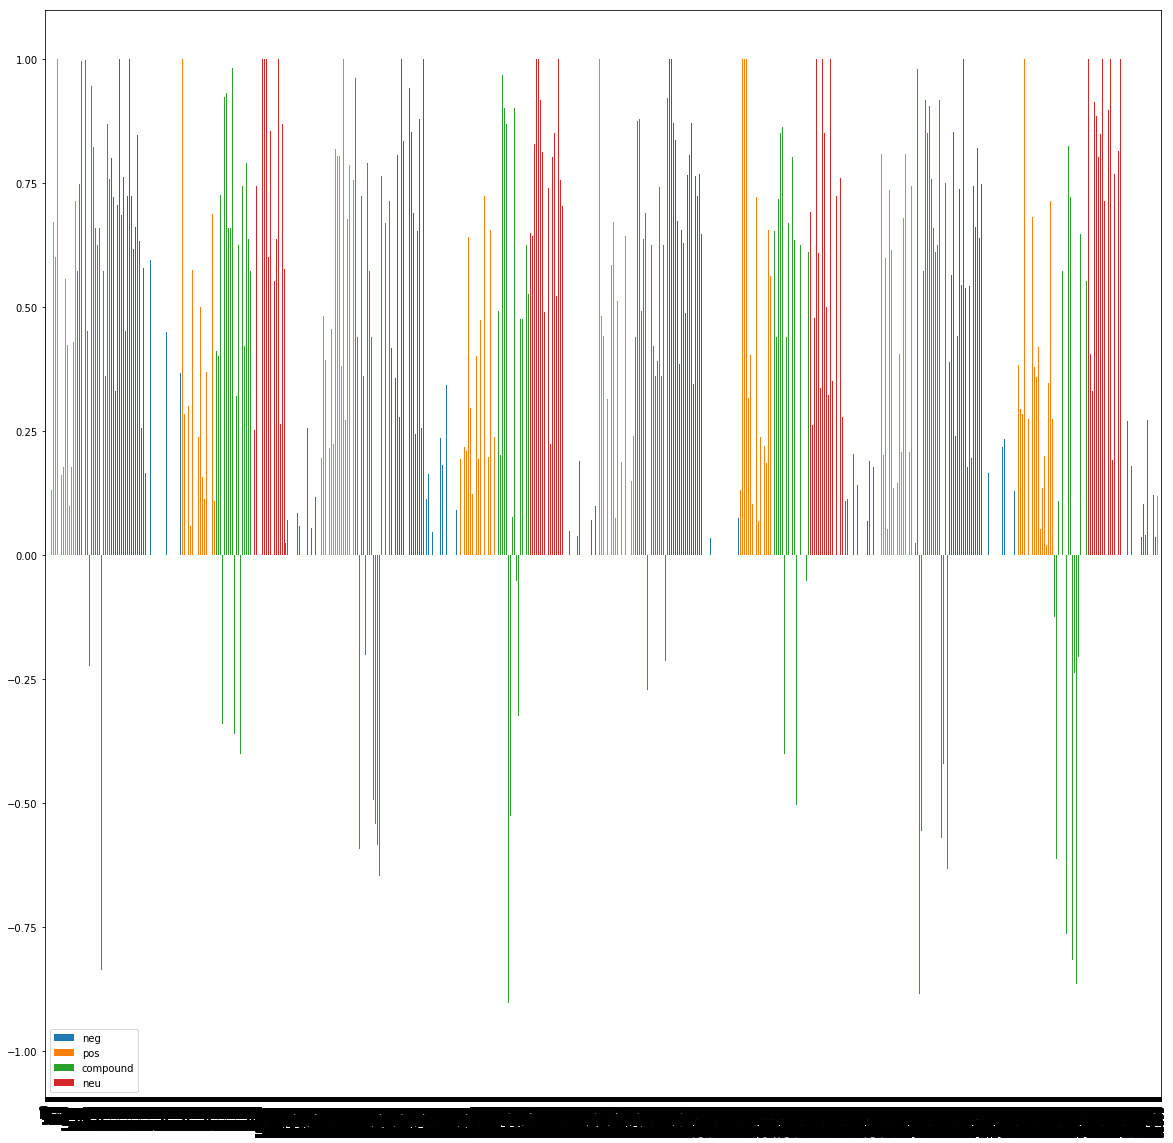

In [82]:
import matplotlib.pyplot as plt
result_apple.plot(y=["neg", "pos", "compound", "neu"], kind="bar", figsize=(20,20))